# CSCI 693 Research

# SL

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [4]:
# Supervised
# Dictionary mapping feature names to full descriptions
feature_descriptions = {
    "FAVC": "Do you eat high caloric food frequently?",
    "FCVC": "Do you usually eat vegetables in your meals?",
    "NCP": "How many main meals do you have daily?",
    "CAEC": "Do you eat any food between meals?",
    "SMOKE": "Do you smoke?",
    "CH2O": "How much water do you drink daily?",
    "SCC": "Do you monitor the calories you eat daily?",
    "FAF": "How often do you have physical activity?",
    "TUE": "How much time do you use technological devices (TV, computer, etc.)?",
    "CALC": "How often do you drink alcohol?",
    "MTRANS": "Which transportation do you usually use?",
    "Gender": "Gender",
    "Age": "Age",
    "Height": "Height",
    "Weight": "Weight",
    "family_history_with_overweight": "Do you have a family history with overweight?",
    "NObeyesdad": "Obesity level"
}

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,              # ✅ reduce depth more
    min_samples_split=10,      # ✅ require more samples to split
    min_samples_leaf=4,        # ✅ require bigger leaves
    max_features='sqrt',
    random_state=42,
    oob_score=True
)

# ✅ Fit the model
clf.fit(X_train, y_train)

# ✅ Predict on test set
y_pred_test = clf.predict(X_test)

# ✅ Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"🧪 Test Accuracy: {test_accuracy:.4f}")

# ✅ Test classification report
print("\n📊 Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

# ✅ Cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')

print(f"\n🔄 Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# ✅ Out-of-bag score
print(f"\n👜 Out-of-Bag Score: {clf.oob_score_:.4f}")


🧪 Test Accuracy: 0.9409

📊 Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.86      0.89      0.87        62
           2       0.97      0.94      0.95        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.91      0.96      0.93        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423


🔄 Cross-Validation Accuracy Scores: [0.92434988 0.90758294 0.94549763 0.92417062 0.93838863]
Mean CV Accuracy: 0.9280

👜 Out-of-Bag Score: 0.9289


Top features influencing obesity prediction:
                           Feature  Importance
3                           Weight    0.384290
6                             FCVC    0.105323
2                           Height    0.090027
1                              Age    0.087681
0                           Gender    0.064013
13                             TUE    0.044758
7                              NCP    0.042071
10                            CH2O    0.033868
12                             FAF    0.032478
8                             CAEC    0.032341
4   family_history_with_overweight    0.031461
14                            CALC    0.023863
15                          MTRANS    0.013427
5                             FAVC    0.011612
11                             SCC    0.002699
9                            SMOKE    0.000088


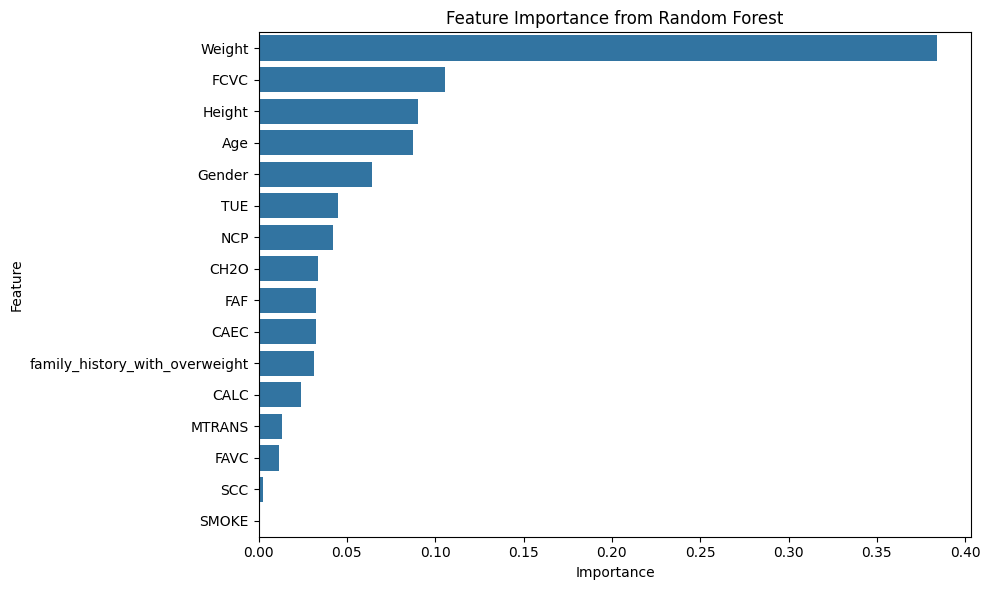

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Extraction
importances = clf.feature_importances_
feature_columns = X.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top features influencing obesity prediction:")
print(feature_importance_df)

# Optional: Save to CSV
# feature_importance_df.to_csv("feature_importance.csv", index=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Step 1: Get top 5 most important modifiable features
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exclude non-modifiable features
non_modifiable = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']
modifiable_importance_df = feature_importance_df[~feature_importance_df['Feature'].isin(non_modifiable)]
top_features = modifiable_importance_df['Feature'].head(11).tolist()

print("Top Modifiable Features:", top_features)

# Step 2: Get unscaled version of test set
X_test_df = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)

# Step 3: Define drastic improvement logic for top modifiable features
def drastically_improve(row, features):
    if 'FAF' in features:
        row['FAF'] = 3.0  # max physical activity
    if 'CH2O' in features:
        row['CH2O'] = 3.0  # max water intake
    if 'FAVC' in features:
        row['FAVC'] = 0  # no high-calorie food
    if 'SMOKE' in features:
        row['SMOKE'] = 0  # non-smoker
    if 'SCC' in features:
        row['SCC'] = 1  # monitors calories
    if 'NCP' in features:
        row['NCP'] = 3.0  # regular 3 meals/day
    if 'FCVC' in features:
        row['FCVC'] = 3.0  # always eats veggies
    if 'CAEC' in features:
        row['CAEC'] = 0  # no snacking
    if 'TUE' in features:
        row['TUE'] = 1.0  # less screen time
    if 'CALC' in features:
        row['CALC'] = 0  # no alcohol
    if 'MTRANS' in features:
        row['MTRANS'] = 1  # walks/bike
    return row

# Step 4: Apply improvement logic to each test sample
X_test_improved_df = X_test_df.copy()
X_test_improved_df = X_test_improved_df.apply(lambda row: drastically_improve(row, top_features), axis=1)

# Step 5: Rescale improved data
X_test_improved_scaled = scaler.transform(X_test_improved_df)

# Step 6: Predict before and after
original_preds = clf.predict(X_test)
improved_preds = clf.predict(X_test_improved_scaled)

# Step 7: Compare results
comparison_df = pd.DataFrame({
    "Original": original_preds,
    "After_Improvement": improved_preds
})
comparison_df["Improved"] = comparison_df["After_Improvement"] < comparison_df["Original"]

# Step 8: Print Summary
total = len(comparison_df)
num_improved = comparison_df["Improved"].sum()
print(f"✅ Out of {total} users, {num_improved} improved with drastic changes in top modifiable features.")

Top Modifiable Features: ['FCVC', 'TUE', 'NCP', 'CH2O', 'FAF', 'CAEC', 'CALC', 'MTRANS', 'FAVC', 'SCC', 'SMOKE']
✅ Out of 423 users, 151 improved with drastic changes in top modifiable features.


# RL

In [9]:
import pandas as pd
import numpy as np

# Step 1: Identify modifiable features
non_modifiable = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

modifiable_importance_df = feature_importance_df[~feature_importance_df['Feature'].isin(non_modifiable)]
top_features = modifiable_importance_df['Feature'].head(11).tolist()

print("🔍 Top RL-targeted features:", top_features)

# Step 2: Inverse transform test set to original scale
X_test_df = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns)

# Step 3: Define incremental recommendation improvement
def incremental_recommendation(row, features):
    actions_log = []
    preds_log = []

    # Initial prediction
    row_scaled = scaler.transform([row])
    current_pred = clf.predict(row_scaled)[0]
    preds_log.append(current_pred)

    for feature in features:
        original_value = row[feature]

        # Define improvement per feature
        if feature == 'FAF' and row['FAF'] < 3.0:
            row['FAF'] = 3.0
            action = "increase_activity"
        elif feature == 'CH2O' and row['CH2O'] < 3.0:
            row['CH2O'] = 3.0
            action = "drink_more_water"
        elif feature == 'FAVC' and row['FAVC'] != 0:
            row['FAVC'] = 0
            action = "reduce_junk_food"
        elif feature == 'SMOKE' and row['SMOKE'] != 0:
            row['SMOKE'] = 0
            action = "quit_smoking"
        elif feature == 'SCC' and row['SCC'] != 1:
            row['SCC'] = 1
            action = "monitor_calories"
        elif feature == 'NCP' and row['NCP'] < 3:
            row['NCP'] = 3.0
            action = "eat_3_meals"
        elif feature == 'FCVC' and row['FCVC'] < 3:
            row['FCVC'] = 3.0
            action = "eat_veggies"
        elif feature == 'CAEC' and row['CAEC'] > 0:
            row['CAEC'] = 0
            action = "stop_snacking"
        elif feature == 'TUE' and row['TUE'] > 1.0:
            row['TUE'] = 1.0
            action = "limit_screen_time"
        elif feature == 'CALC' and row['CALC'] > 0:
            row['CALC'] = 0
            action = "avoid_alcohol"
        elif feature == 'MTRANS' and row['MTRANS'] != 1:
            row['MTRANS'] = 1
            action = "use_active_transport"
        else:
            continue  # skip if no improvement needed

        # Apply improvement
        actions_log.append(action)

        # Predict after improvement
        row_scaled = scaler.transform([row])
        current_pred = clf.predict(row_scaled)[0]
        preds_log.append(current_pred)

        # Stop if already improved
        if current_pred < preds_log[0]:
          print(f"Improved from class {preds_log[0]} to {current_pred} after {action}")
          break


    return preds_log, actions_log

# Step 4: Apply incremental recommendations to each user
results = []

for idx, row in X_test_df.iterrows():
    preds_log, actions_log = incremental_recommendation(row.copy(), top_features)

    results.append({
        'Initial_Prediction': preds_log[0],
        'Final_Prediction': preds_log[-1],
        'Improved': preds_log[-1] < preds_log[0],
        'Num_Steps': len(actions_log),
        'Actions_Taken': actions_log,
        'Predictions_Over_Time': preds_log
    })

# Step 5: Convert results to DataFrame
incremental_df = pd.DataFrame(results)

# Step 6: Summary
total_users = len(incremental_df)
num_improved = incremental_df['Improved'].sum()

print(f"✅ Incremental RL Simulation: {num_improved}/{total_users} users improved ({round(100*num_improved/total_users,2)}%)")
print("\n🔍 Example Improved Users:")
print(incremental_df[incremental_df['Improved']].head(5))


🔍 Top RL-targeted features: ['FCVC', 'TUE', 'NCP', 'CH2O', 'FAF', 'CAEC', 'CALC', 'MTRANS', 'FAVC', 'SCC', 'SMOKE']
Improved from class 5 to 1 after drink_more_water
Improved from class 2 to 1 after stop_snacking
Improved from class 3 to 2 after increase_activity
Improved from class 6 to 1 after eat_veggies
Improved from class 3 to 2 after increase_activity
Improved from class 5 to 1 after stop_snacking
Improved from class 6 to 1 after stop_snacking
Improved from class 6 to 1 after stop_snacking
Improved from class 5 to 1 after stop_snacking
Improved from class 6 to 1 after eat_veggies
Improved from class 5 to 1 after stop_snacking
Improved from class 3 to 2 after increase_activity
Improved from class 2 to 1 after stop_snacking
Improved from class 5 to 1 after increase_activity
Improved from class 6 to 1 after use_active_transport
Improved from class 5 to 1 after stop_snacking
Improved from class 3 to 2 after increase_activity
Improved from class 2 to 1 after eat_veggies
Improved from 